In [2]:
%reset -f
import sys
sys.path.append("/home/jose/Documents/Maestria/Codigo/OTI/build/")
import Calc_Cable as cab
import pyoti.sparse as oti
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#SOLUCION PARA EL CABLE DEL PAPER IRVINE
order = 2
nbases = 6


#Lectura de datos de entrada
l,h,L0,A0,E,w,cargas = cab.leer_entradas("linea_vida_0")

#Pertubar parametros (no sirve para perturbar cargas y ubicacion s de las cargas)
# e1 = oti.e(1,nbases=nbases, order=order)
# e2 = oti.e(2,nbases=nbases, order=order)
e3 = oti.e(3,nbases=nbases, order=order)
# e4 = oti.e(4,nbases=nbases, order=order)
# e5 = oti.e(5,nbases=nbases, order=order)
# e6 = oti.e(6,nbases=nbases, order=order)
# l = l + e1
# h = h + e2
L0 = L0 + e3
# A0 = A0 + e4
# E = E + e5
# w = w + e6

#convertir adimensionales
gamma,delta,beta,Psi,Sigmas = cab.param_adim(l,h,L0,A0,E,w,cargas)

#calcular las incognitas gi fi
gi_0, fi_0 = 0.05 , 0.09 #valores iniciales para iterar en newton
gi,fi = cab.calc_gi_fi(order,nbases,gamma,delta,beta,Psi,Sigmas,gi_0,fi_0)

X = gi*w*L0
Y0 = fi*w*L0
print("X = ",X.get_deriv(0)[0,0])
print("Y0 = ",Y0.get_deriv(0)[0,0])

#calcular curva
p = 100 #puntos de la curva
A = cab.curva(nbases,order,gi,fi,beta,Psi,Sigmas,p)

#Convertir a dimensionales    
x = (A[:,0]*L0).get_deriv(0)
y = (A[:,1]*L0).get_deriv(0)
T = (A[:,2]*w*L0).get_deriv(0)
print("T= ",T[-2])

#Graficar cable
cab.plot_curva(x,y,T,u)

X =  65.42704315881183
Y0 =  -1.757057548841629
T=  [73.43302968]
Conf. 0: x = 4.0855109364029 , y = -0.6007754945846191
X =  16996.16107561158
Y0 =  -650.9927094656734
T=  [19085.68382699]
Conf. 1: x = 4.147823323780997 , y = -0.16080162331805922


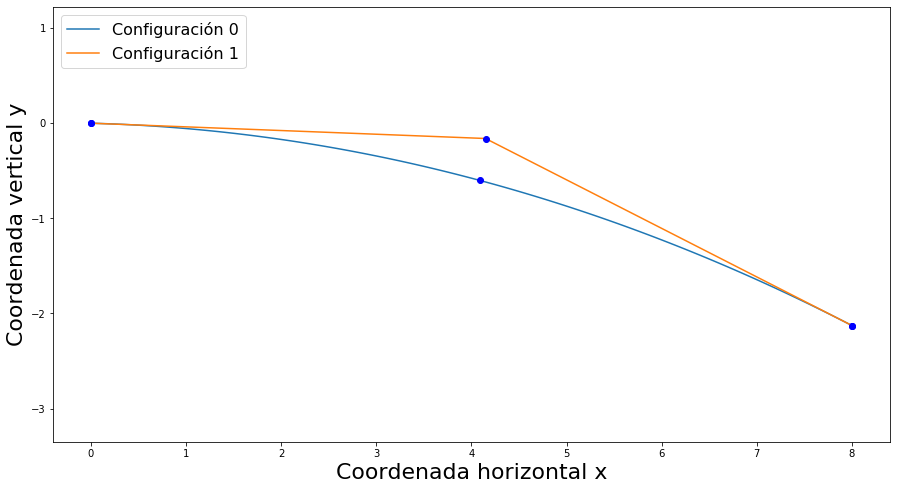

In [3]:
#SOLUCION PARA EL CABLE DEL PAPER IRVINE
order = 2
nbases = 6

for u in range(0,2):
    #Lectura de datos de entrada
    l,h,L0,A0,E,w,cargas = cab.leer_entradas("linea_vida_"+str(u))

    #Pertubar parametros (no sirve para perturbar cargas y ubicacion s de las cargas)
    # e1 = oti.e(1,nbases=nbases, order=order)
    # e2 = oti.e(2,nbases=nbases, order=order)
    e3 = oti.e(3,nbases=nbases, order=order)
    # e4 = oti.e(4,nbases=nbases, order=order)
    # e5 = oti.e(5,nbases=nbases, order=order)
    # e6 = oti.e(6,nbases=nbases, order=order)
    # l = l + e1
    # h = h + e2
    #L0 = L0 + e3
    # A0 = A0 + e4
    # E = E + e5
    # w = w + e6

    #convertir adimensionales
    gamma,delta,beta,Psi,Sigmas = cab.param_adim(l,h,L0,A0,E,w,cargas)

    #calcular las incognitas gi fi
    gi_0, fi_0 = 0.05 , 0.09 #valores iniciales para iterar en newton
    gi,fi = cab.calc_gi_fi(order,nbases,gamma,delta,beta,Psi,Sigmas,gi_0,fi_0)

    X = gi*w*L0
    Y0 = fi*w*L0
    print("X = ",X.get_deriv(0)[0,0])
    print("Y0 = ",Y0.get_deriv(0)[0,0])

    #calcular curva
    p = 100 #puntos de la curva
    A = cab.curva(nbases,order,gi,fi,beta,Psi,Sigmas,p)

    #Convertir a dimensionales    
    x = (A[:,0]*L0).get_deriv(0)
    y = (A[:,1]*L0).get_deriv(0)
    T = (A[:,2]*w*L0).get_deriv(0)
    print("T= ",T[-2])

    #Graficar cable
    cab.plot_curva(x,y,T,u)

In [4]:
-0.6007754945846191+0.16080162331805922

-0.43997387126655985

In [18]:
8.28+0.0684

8.3484

In [6]:
def esti(F,E,L0,A0):
    dL = F*L0/(E*A0)
    return dL

In [9]:
dL2=esti(T[-2,0], E, 8.278, A0)
dL1=esti(T[-2,0], E, 4, A0)

dL = dL1+dL2
print(dL)

0.052990656580477434


0.017263611852248714